In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
gesinputs = pd.read_hdf('/data/jls/GaiaDR2/spectro/GES_input.hdf5')

In [3]:
from astropy.table import Table
ges = Table.read('/data/jls/GaiaDR2/spectro/GES_distances_withPRIOR.hdf5')

/home/jls/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
def input_output(inputs, data, a, title):
    fltr = data['flag']==0
    fltr &= data['log10_age']>-1.
    plt.sca(a[0])
    plt.scatter(np.log10(inputs['teff'][fltr]),inputs['logg'][fltr],
                c=inputs['fe_h'][fltr],s=1,cmap=plt.cm.viridis, alpha=0.4, vmin=-2., vmax=0.5);
    plt.xlabel(r'$\log_{10}T_\mathrm{eff}$')
    plt.ylabel(r'$\log g$')
    plt.annotate(title,xy=(0.05,0.95),ha='left',va='top',xycoords='axes fraction',fontsize=16)
    plt.colorbar(label='[M/H]')
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlim(4.,3.4)
    plt.ylim(5.5,-0.5)
    plt.sca(a[1])
    plt.scatter(data['log10_teff'][fltr],data['logg'][fltr],c=data['Z'][fltr],s=1,
                cmap=plt.cm.viridis, alpha=0.4, vmin=-2., vmax=0.5);
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xlabel(r'$\log_{10}T_\mathrm{eff}$')
    plt.ylabel(r'$\log g$')
    plt.colorbar(label='[M/H]')
    plt.xlim(4.,3.4)
    plt.ylim(5.5,-0.5)
    plt.tight_layout()

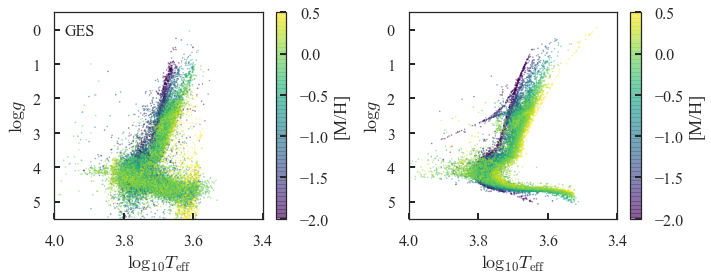

In [12]:
f, a=plt.subplots(1,2,figsize=[10.,4.])
input_output(gesinputs[ges['flag']==0], ges[ges['flag']==0], a, 'GES')

In [21]:
def giant(data):
    return data['logg']<(3.8-.5*(data['log10_teff']-3.7))

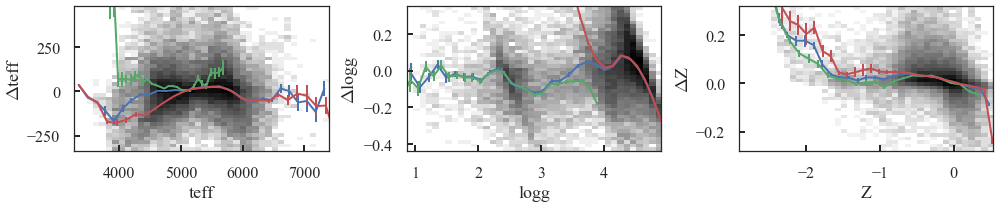

In [43]:
from matplotlib.colors import LogNorm
from plotting_general import running_median
f,a=plt.subplots(1,3,figsize=[14.,3.])
plim=[0.1,97.]
plim2=[5.,95.]
ges['teff']=np.power(10.,ges['log10_teff'])
for i,(t,t2) in enumerate(zip(['teff', 'logg', 'Z'],['teff','logg','fe_h'])):
    plt.sca(a[i])
#     plt.hexbin(gesinputs[t2],ges[t]-gesinputs[t2],C=gesinputs['e_'+t2],
#                vmin=np.nanpercentile(gesinputs['e_'+t2],0.5),vmax=np.nanpercentile(gesinputs['e_'+t2],99.5))
    plt.hist2d(gesinputs[t2],ges[t]-gesinputs[t2],
              range=[np.nanpercentile(gesinputs[t2],plim),np.nanpercentile(ges[t]-gesinputs[t2],plim2)],
              bins=40,norm=LogNorm())
    r = running_median(gesinputs[t2],ges[t]-gesinputs[t2],nbins=30,percentiles=plim)
    plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(r[4]))
    r = running_median(gesinputs[t2][giant(ges)],(ges[t]-gesinputs[t2])[giant(ges)],
                       nbins=30,percentiles=plim)
    plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(r[4]))
    r = running_median(gesinputs[t2][~giant(ges)],(ges[t]-gesinputs[t2])[~giant(ges)],
                       nbins=30,percentiles=plim)
    plt.errorbar(r[0],r[1],.5*(r[3]-r[2])/np.sqrt(r[4]))
    plt.ylim(*np.nanpercentile(ges[t]-gesinputs[t2],plim2))
    plt.xlabel(t)
    plt.ylabel(r'$\Delta$'+t)
plt.tight_layout()

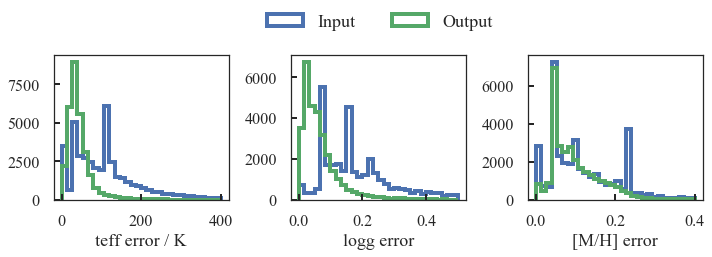

In [69]:
f,a=plt.subplots(1,3,figsize=[10.,3.])
plt.sca(a[0])
plt.hist(gesinputs['e_teff'],range=[0.,400.],histtype='step',lw=4,bins=30,label='Input')
# plt.hist(gesinputs['teff_val'],range=[0.,400.],histtype='step',lw=4,bins=30)
plt.hist(ges['log10_teff_err']*np.log(10.)*np.power(10.,ges['log10_teff']),
         range=[0.,400.],histtype='step',lw=4,bins=30,label='Output');
plt.legend(ncol=2,bbox_to_anchor=(2.6,1.4))
plt.xlabel('teff error / K')
plt.sca(a[1])
plt.hist(gesinputs['e_logg'],range=[0.,0.5],histtype='step',lw=4,bins=30)
plt.hist(ges['logg_err'],range=[0.,0.5],histtype='step',lw=4,bins=30);
plt.xlabel('logg error')
plt.sca(a[2])
plt.hist(gesinputs['e_fe_h'],range=[0.,0.4],histtype='step',lw=4,bins=30)
plt.hist(ges['Z_err'],range=[0.,0.4],histtype='step',lw=4,bins=30);
plt.xlabel('[M/H] error')
plt.tight_layout()